In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'


pd.options.display.max_columns = None
df = pd.read_csv('verbose_course_ratings.csv')
df.describe()

,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,max_sent_score,min_sent_score,max_gem_probability,course_id
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,891.000000
mean,27.257519,35.767544,4.297437,4.466792,4.547619,0.705813,4.044336,4.220551,4.241228,0.328491,6.034417,5.529762,6.051378,2.775558,4.258521,4.433897,4.517544,0.757632,0.653309,0.745612,0.583467,0.255849,0.006645,0.000627,0.000627,-0.035415,0.920856,-0.192056,0.071688,145449.185185
std,46.303680,58.946056,0.542116,0.664005,0.729745,0.344507,1.562196,1.634247,1.661311,0.613266,3.064891,2.950303,3.871752,1.787967,0.542590,0.646561,0.735362,0.374812,0.216953,0.236335,0.419178,0.349791,0.037017,0.025031,0.025031,0.244654,0.166512,0.311149,0.246849,43656.718387
min,5.000000,5.000000,1.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,2.230000,2.000000,1.000000,-1.000000,-0.421500,-0.421500,-0.922400,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-0.994500,0.000000,4.000000
25%,8.000000,11.000000,4.000000,4.000000,4.000000,0.460566,4.200000,4.500000,5.000000,0.000000,3.790000,3.500000,3.000000,1.520000,3.900000,4.000000,4.000000,0.520000,0.541945,0.680100,0.172025,0.154341,0.000000,0.000000,0.000000,0.000000,0.934775,-0.324325,0.000000,114389.000000
50%,12.000000,15.000000,4.400000,5.000000,5.000000,0.729704,4.670000,5.000000,5.000000,0.416333,5.285000,5.000000,5.000000,2.280000,4.335000,4.750000,5.000000,0.800000,0.696945,0.831125,0.771900,0.326996,0.000000,0.000000,0.000000,0.000000,0.976350,0.000000,0.000000,122752.000000
75%,24.000000,33.000000,4.710000,5.000000,5.000000,0.960941,4.890000,5.000000,5.000000,0.731955,7.780000,7.000000,8.000000,3.500000,4.670000,5.000000,5.000000,1.020000,0.812600,0.907338,0.935475,0.440582,0.000000,0.000000,0.000000,0.000000,0.990300,0.000000,0.000000,203520.000000
max,536.000000,693.000000,5.000000,5.000000,5.000000,1.725009,5.000000,5.000000,5.000000,1.752343,20.000000,20.000000,30.000000,13.230000,5.000000,5.000000,5.000000,1.850000,0.986800,0.988600,0.998400,1.201233,1.000000,1.000000,1.000000,0.500000,0.999400,0.000000,0.998700,224524.000000


In [2]:
df.dtypes

course_code                object
course_title               object
course_teacher             object
link                       object
fas_code                   object
unique_code                object
num_responded             float64
num_students              float64
course_score_mean         float64
course_score_median       float64
course_score_mode         float64
course_score_stdev        float64
lecturer_score_mean       float64
lecturer_score_median     float64
lecturer_score_mode       float64
lecturer_score_stdev      float64
workload_score_mean       float64
workload_score_median     float64
workload_score_mode       float64
workload_score_stdev      float64
rec_score_mean            float64
rec_score_median          float64
rec_score_mode            float64
rec_score_stdev           float64
sentiment_score_mean      float64
sentiment_score_median    float64
sentiment_score_mode      float64
sentiment_score_stdev     float64
gem_probability_mean      float64
gem_probabilit

In [3]:
df['course_id']

0            NaN
1            NaN
2       123591.0
3       222142.0
4            NaN
          ...   
1593         NaN
1594         NaN
1595         NaN
1596    113088.0
1597    216815.0
Name: course_id, Length: 1598, dtype: float64

In [4]:
df['course_id'].fillna(-1,inplace=True)
df['course_id'] = df['course_id'].astype(int).astype(str)

In [5]:
df['course_identifier'] = df['course_code'] + ' ' + df['course_title']
df = df.drop_duplicates(subset='course_identifier', keep="first")

In [6]:
df.nlargest(5,'sentiment_score_mean')

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier
1484,SOC-STD 98VE,"Empire, Capitalism, and Global Economic Develo...",Martin,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-220522-2238-1-1-001,FAS-220522-2238-1-1-001(Martin),5.0,7.0,5.00,5.0,5.0,0.000000,4.80,5.0,5.0,0.402015,5.20,5.0,5.0,2.28,5.00,5.0,5.0,0.00,0.986800,0.98680,0.9868,-1.000000,0.0,0.0,0.0,-1.0,Loved this course! The professor is amazing an...,0.9868,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOC-STD 98VE Empire, Capitalism, and Global Ec..."
503,EXPOS 20,Expository Writing 20 246,Turley,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-116353-2238-1-1-246,FAS-116353-2238-1-1-246(Turley),12.0,14.0,4.36,4.0,4.0,0.482418,4.91,5.0,5.0,0.287623,7.11,6.0,5.0,3.18,4.18,4.0,5.0,0.87,0.981250,0.97855,0.9798,0.008913,0.0,0.0,0.0,0.0,THIS IS THE BEST EXPOS. YOU SHOULD TAKE THIS S...,0.9941,NaN,0.0,NaN,0.0,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 20 246
1229,PHIL 98,Tutorial II 001,Hall,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-116407-2238-1-1-001,FAS-116407-2238-1-1-001(Hall),7.0,9.0,5.00,5.0,5.0,0.000000,0.00,0.0,0.0,-1.000000,5.20,5.0,10.0,3.11,5.00,5.0,5.0,0.00,0.979133,0.98170,0.9654,0.012647,0.0,0.0,0.0,0.0,Yuan is incredible! Could not recommend taking...,0.9903,NaN,0.0,NaN,0.0,116407,Primarily for Undergraduate Students,Philosophy,Philosophy,NaN,Arts and Humanities,NaN,Tutorial,Tutorial II,PHIL 98 Tutorial II 001
405,ENGLISH 90RI,Race in the Age of Artificial Intelligence 001,Dikcis,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-222129-2238-1-1-001,FAS-222129-2238-1-1-001(Dikcis),13.0,14.0,4.85,5.0,5.0,0.545320,4.85,5.0,5.0,0.545320,4.23,4.0,4.0,2.20,4.92,5.0,5.0,0.28,0.977900,0.98580,0.9945,0.018691,0.0,0.0,0.0,0.0,"TAKE THIS CLASS. Great prof, great syllabus, a...",0.9973,NaN,0.0,NaN,0.0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENGLISH 90RI Race in the Age of Artificial Int...
66,AFVS 40H,Introduction to Still Photography 002,Helmar,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-220429-2238-1-1-002,FAS-220429-2238-1-1-002(Helmar),8.0,11.0,4.25,5.0,5.0,1.320216,4.25,5.0,5.0,1.320216,6.50,6.0,6.0,2.93,4.00,4.5,5.0,1.41,0.977325,0.98610,0.9956,0.025079,0.0,0.0,0.0,0.0,"Beyond the time and effort it requires, which ...",0.9956,NaN,0.0,NaN,0.0,220429,Primarily for Undergraduate Students,"Art, Film, and Visual Studies","Art, Film, and Visual Studies",NaN,Arts and Humanities,NaN,Studio,Introduction to Still Photography,AFVS 40H Introduction to Still Photography 002


In [7]:
dftest = df.sample(20)
dftest.describe()

,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,max_sent_score,min_sent_score,max_gem_probability
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.0,20.000000,20.000000,20.000000,20.0
mean,17.450000,21.350000,4.320000,4.475000,4.550000,0.694513,4.053000,4.150000,4.1500,0.401867,6.477000,6.100000,6.40000,2.758000,4.284000,4.375000,4.250000,0.718500,0.677059,0.762790,0.753915,0.168617,0.0,0.0,0.0,-0.100000,0.905990,-0.176450,0.0
std,17.661957,19.583223,0.646659,0.880714,1.050063,0.284024,1.501957,1.631112,1.7252,0.603358,2.345895,2.118838,2.18608,1.323809,0.685461,0.871704,1.164158,0.370821,0.237717,0.226654,0.283388,0.441290,0.0,0.0,0.0,0.307794,0.217630,0.344729,0.0
min,5.000000,6.000000,2.370000,2.000000,1.000000,0.348735,0.000000,0.000000,0.0000,-1.000000,4.000000,3.000000,3.00000,1.310000,2.370000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.0,0.0,-1.000000,0.000000,-0.967200,0.0
25%,8.000000,11.250000,4.165000,4.000000,5.000000,0.430479,4.300000,4.000000,4.7500,0.204495,4.832500,4.500000,5.00000,2.120000,4.217500,4.000000,4.000000,0.455000,0.662906,0.632963,0.621775,0.116452,0.0,0.0,0.0,0.000000,0.928825,-0.133425,0.0
50%,10.000000,13.000000,4.555000,5.000000,5.000000,0.691887,4.615000,5.000000,5.0000,0.463780,6.065000,6.000000,6.00000,2.480000,4.420000,5.000000,5.000000,0.665000,0.729117,0.868550,0.880250,0.235109,0.0,0.0,0.0,0.000000,0.963300,0.000000,0.0
75%,13.000000,17.250000,4.757500,5.000000,5.000000,0.825157,4.822500,5.000000,5.0000,0.747612,7.402500,8.000000,8.00000,2.992500,4.752500,5.000000,5.000000,0.950000,0.840805,0.899300,0.948700,0.425777,0.0,0.0,0.0,0.000000,0.986975,0.000000,0.0
max,59.000000,70.000000,4.860000,5.000000,5.000000,1.306549,5.000000,5.000000,5.0000,1.335264,12.900000,11.000000,10.00000,7.390000,5.000000,5.000000,5.000000,1.370000,0.909125,0.941600,0.996700,0.638663,0.0,0.0,0.0,0.000000,0.999400,0.000000,0.0


In [8]:
import re
from nltk import tokenize
import nltk
nltk.download('punkt')

df['best_gem_comment'].fillna('',inplace=True)

def get_short_gem_comment(comment):
  if comment == '':
    return ''
  for sentence in tokenize.sent_tokenize(comment):
    if re.search(r'\bgem\b',sentence.lower()):
      return sentence
  assert False


df['best_gem_comment_short'] = df['best_gem_comment'].apply(get_short_gem_comment)

[nltk_data] Downloading package punkt to /Users/jeqcho/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
df['course_title_2024'].fillna('',inplace=True)

def get_useful_title(row):
  if row['course_code'].startswith('EXPOS 20'):
    return row['course_title']
  # somehow my.harvard gives an error if the title starts with a single word
  # followed by a colon
  return row['course_title_2024'].replace(':','')


df['useful_title'] = df.apply (lambda row: get_useful_title(row), axis=1)

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['best_comment'].fillna('',inplace=True)

def get_short_comment(comment):
  if comment == '':
    return ''
  max_score = 0
  best_short_comment = ''
  for sentence in tokenize.sent_tokenize(comment):
    score = sia.polarity_scores(sentence)['compound']
    if score > max_score:
      max_score = score
      best_short_comment = sentence
  return best_short_comment


df['best_comment_short'] = df['best_comment'].apply(get_short_comment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jeqcho/nltk_data...


In [11]:
def get_first_sentece(comment):
  if comment == '':
    return ''
  return tokenize.sent_tokenize(comment)[0]


df['best_comment_first'] = df['best_comment'].apply(get_first_sentece)

In [12]:
!pip install xlsxwriter
df.to_excel("verbose_course_ratings.xlsx", engine='xlsxwriter')


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


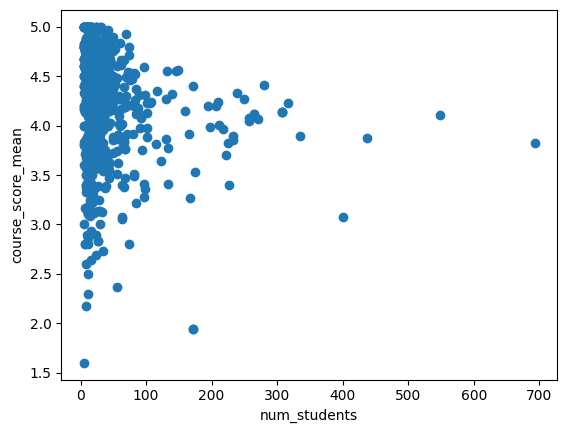

In [13]:
plt.scatter(df['num_students'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('num_students')
plt.ylabel('course_score_mean')
plt.gca().set_facecolor('white')
# Show the plot
plt.show()

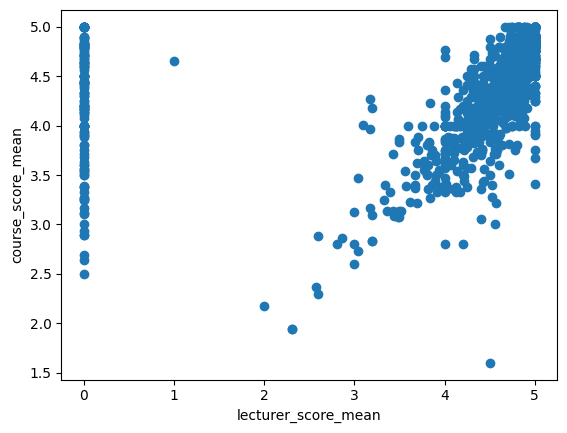

In [14]:
plt.scatter(df['lecturer_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('lecturer_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

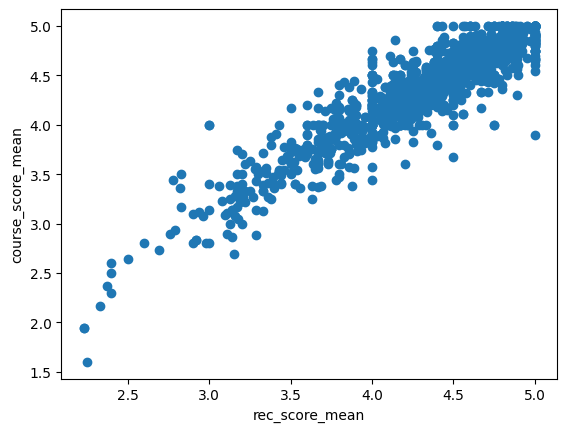

In [15]:
plt.scatter(df['rec_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('rec_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

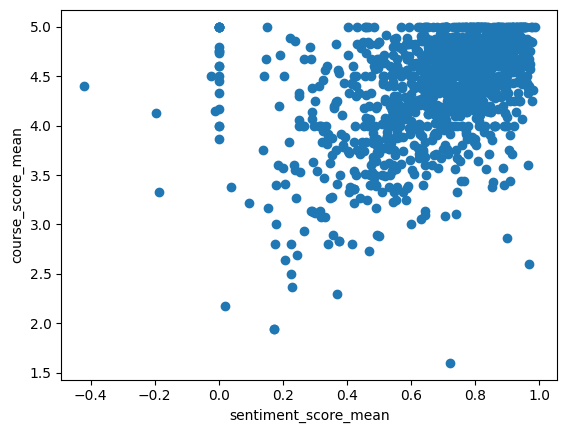

In [16]:
plt.scatter(df['sentiment_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('sentiment_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

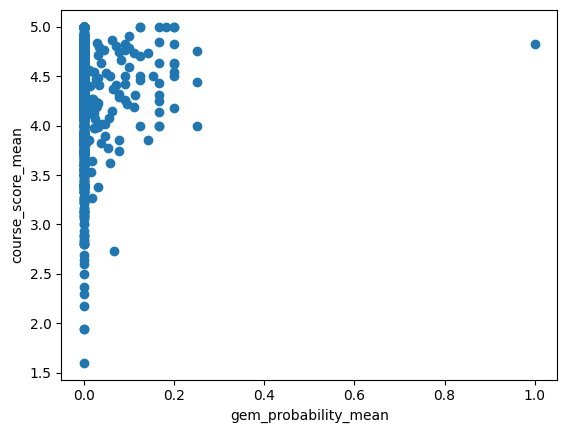

In [18]:
plt.scatter(df['gem_probability_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('gem_probability_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

103


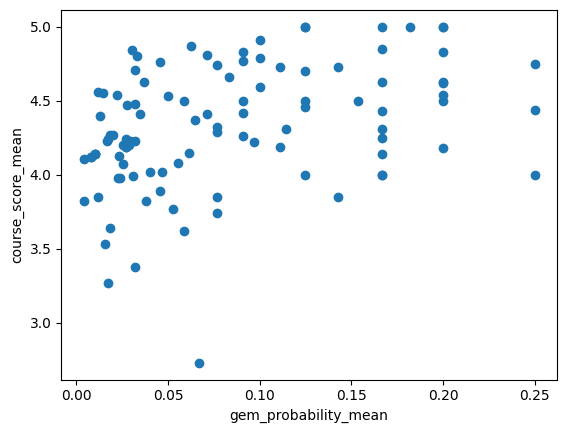

In [19]:
df_course_gem = df[df['gem_probability_mean'] > 0]
df_course_gem = df_course_gem[df_course_gem['gem_probability_mean'] < 1]
print(len(df_course_gem))
plt.scatter(df_course_gem['gem_probability_mean'], df_course_gem['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('gem_probability_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

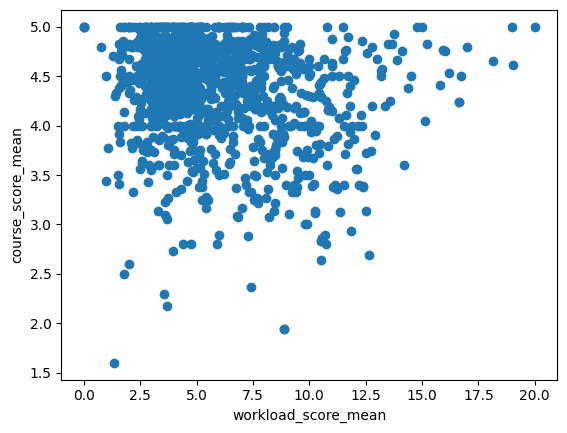

In [20]:
plt.scatter(df['workload_score_mean'], df['course_score_mean'])

# Add x-axis and y-axis labels
plt.xlabel('workload_score_mean')
plt.ylabel('course_score_mean')

# Show the plot
plt.show()

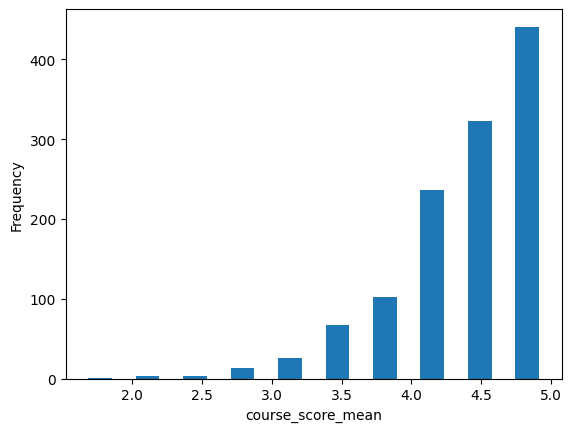

In [21]:
plt.hist(df['course_score_mean'], rwidth=.5)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

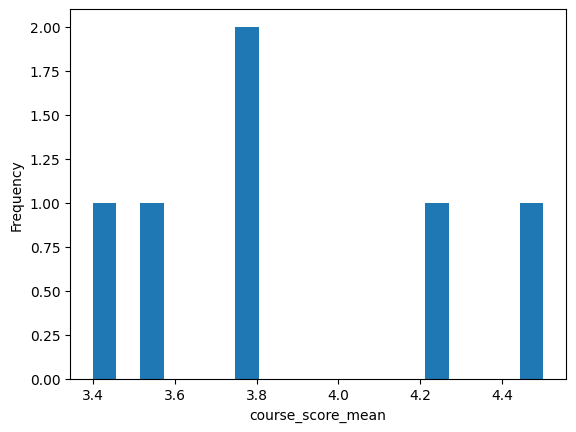

,course_code,course_title,course_score_mean,workload_score_mean
48,APMTH 121,Introduction to Optimization: Models and Metho...,4.53,6.69
42,APMTH 10,Computing with Python for Scientists and Engin...,4.21,7.28
50,APMTH 205,Advanced Scientific Computing: Numerical Metho...,3.75,9.89
51,APMTH 207,Advanced Scientific Computing: Stochastic Meth...,3.72,12.50
46,APMTH 104,Complex and Fourier Analysis with Applications...,3.49,7.62
45,APMTH 22A,Solving and Optimizing 001,3.37,6.77


In [22]:
plt.hist(df['course_score_mean'][df['department']=="Applied Mathematics"], rwidth=.5)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

df[df['department']=="Applied Mathematics"][[
"course_code",
    "course_title",
    "course_score_mean",
    "workload_score_mean"
]].sort_values(by=['course_score_mean'],ascending=False)

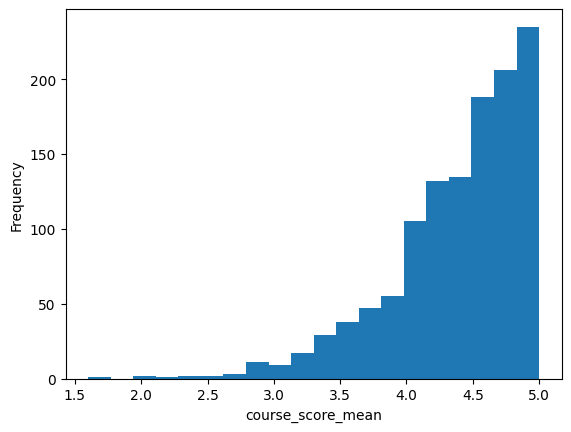

In [23]:
plt.hist(df['course_score_mean'],bins=20)

# Add x-axis and y-axis labels
plt.xlabel('course_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

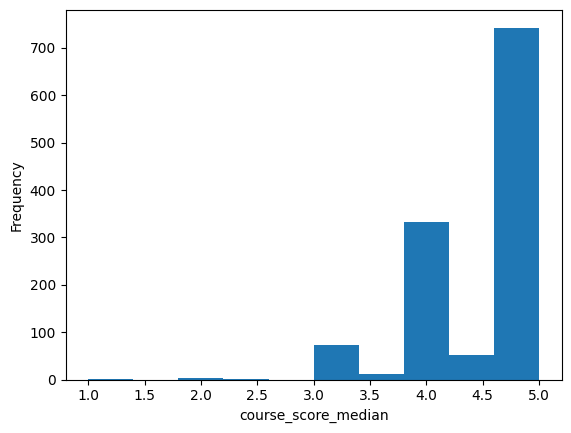

In [24]:
plt.hist(df['course_score_median'])

# Add x-axis and y-axis labels
plt.xlabel('course_score_median')
plt.ylabel('Frequency')

# Show the plot
plt.show()

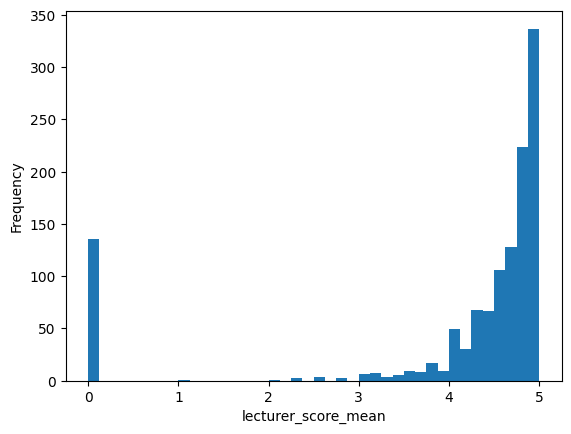

In [25]:
plt.hist(df['lecturer_score_mean'],bins=40)

# Add x-axis and y-axis labels
plt.xlabel('lecturer_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

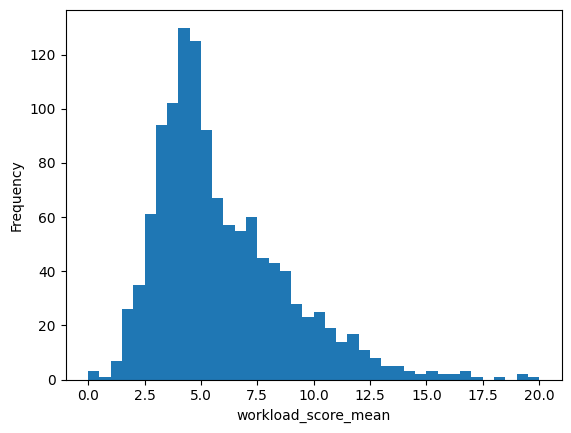

In [26]:
plt.hist(df['workload_score_mean'],bins=40)

# Add x-axis and y-axis labels
plt.xlabel('workload_score_mean')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [27]:
df['num_students'].describe()

count    1218.000000
mean       28.105911
std        49.210875
min         5.000000
25%        10.000000
50%        14.000000
75%        25.000000
max       693.000000
Name: num_students, dtype: float64

In [28]:
import numpy

df_super_gem = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_probability_mean'] > 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['course_level'] != 'Graduate Course')
]

print(len(df_super_gem))
df_super_gem = df_super_gem.sort_values(by=['gem_probability_mean'],ascending=False)
df_super_gem

21


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
523,FYSEMR 22H,My Genes and Cancer 01,Parmigiani,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-159990-2238-1-1-01,FAS-159990-2238-1-1-01(Parmigiani),10.0,13.0,4.44,5.0,5.0,0.687184,4.80,5.0,5.0,0.402015,1.90,2.0,1.0,0.88,4.70,5.0,5.0,0.48,0.544825,0.53105,0.9847,0.379441,0.250000,0.0,0.0,0.462910,Please take this seminar! Giovanni is an amazi...,0.9847,NaN,0.0000,If you have any sort of interest in cancer/gen...,0.4033,159990,Primarily for Undergraduate Students,First Year Seminar Program,First Year Seminar,NaN,None,NaN,Seminar,My Genes and Cancer,FYSEMR 22H My Genes and Cancer 01,If you have any sort of interest in cancer/gen...,My Genes and Cancer,"He is great at facilitating discussions, and h...",Please take this seminar!
1535,STAT 236,"Sparse Inference, and Network and Text Analysi...",Ke,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-211175-2238-1-1-001,FAS-211175-2238-1-1-001(Ke),25.0,30.0,4.62,5.0,5.0,0.582586,4.95,5.0,5.0,0.219043,4.70,4.0,3.0,2.87,4.62,5.0,5.0,0.50,0.628380,0.81760,0.9536,0.520131,0.200000,0.0,0.0,0.447214,Take this class if you'd like a gem and the op...,0.9536,There is no homework and the only thing is a f...,-0.2960,Take this class if you'd like a gem and the op...,0.9536,211175,Primarily for Graduate Students,Statistics,Statistics,NaN,Science & Engineering & Applied Science,NaN,Lecture,"Sparse Inference, and Network and Text Analysis","STAT 236 Sparse Inference, and Network and Tex...",Take this class if you'd like a gem and the op...,"Sparse Inference, and Network and Text Analysis",Take this class if you'd like a gem and the op...,Take this class if you'd like a gem and the op...
1460,SLAVIC 175,Between East and West: A Critical Mapping of P...,Kremer,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-205086-2238-1-1-1,FAS-205086-2238-1-1-1(Kremer),6.0,7.0,4.50,5.0,5.0,0.769724,4.83,5.0,5.0,0.377525,4.80,5.0,5.0,1.48,4.50,5.0,5.0,0.84,0.605500,0.75200,0.5316,0.375486,0.200000,0.0,0.0,0.447214,Professor Kremer is fantastic and I highly hig...,0.9720,Just take it. Many themes in Polish culture ar...,-0.0054,TAKE THIS CLASS! It is truly a GEM because of ...,0.7520,205086,For Undergraduate and Graduate Students,Slavic Languages & Literatures,Slavic,NaN,Arts and Humanities,NaN,Lecture,Between East and West: A Critical Mapping of P...,SLAVIC 175 Between East and West: A Critical M...,It is truly a GEM because of how accessible Dr...,Between East and West A Critical Mapping of Po...,Professor Kremer is fantastic and I highly hig...,Professor Kremer is fantastic and I highly hig...
474,EXPOS 20,Expository Writing 20 216,Gold,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-116353-2238-1-1-216,FAS-116353-2238-1-1-216(Gold),14.0,15.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,4.69,5.0,5.0,2.02,5.00,5.0,5.0,0.00,0.870918,0.98620,0.8345,0.294680,0.181818,0.0,0.0,0.404520,THIS CLASS IS AMAZING! TAKE IT!!!!! Ranking t...,0.9992,NaN,0.0000,This Expos class is a gem and make this your t...,0.9933,116353,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Expository Writing 20,EXPOS 20 Expository Writing 

In [29]:
df_super_gem = df_super_gem[df_super_gem['course_code'] != 'EXPOS 20']
df_super_gem

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
523,FYSEMR 22H,My Genes and Cancer 01,Parmigiani,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-159990-2238-1-1-01,FAS-159990-2238-1-1-01(Parmigiani),10.0,13.0,4.44,5.0,5.0,0.687184,4.80,5.0,5.0,0.402015,1.90,2.0,1.0,0.88,4.70,5.0,5.0,0.48,0.544825,0.53105,0.9847,0.379441,0.250000,0.0,0.0,0.462910,Please take this seminar! Giovanni is an amazi...,0.9847,NaN,0.0000,If you have any sort of interest in cancer/gen...,0.4033,159990,Primarily for Undergraduate Students,First Year Seminar Program,First Year Seminar,NaN,None,NaN,Seminar,My Genes and Cancer,FYSEMR 22H My Genes and Cancer 01,If you have any sort of interest in cancer/gen...,My Genes and Cancer,"He is great at facilitating discussions, and h...",Please take this seminar!
1535,STAT 236,"Sparse Inference, and Network and Text Analysi...",Ke,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-211175-2238-1-1-001,FAS-211175-2238-1-1-001(Ke),25.0,30.0,4.62,5.0,5.0,0.582586,4.95,5.0,5.0,0.219043,4.70,4.0,3.0,2.87,4.62,5.0,5.0,0.50,0.628380,0.81760,0.9536,0.520131,0.200000,0.0,0.0,0.447214,Take this class if you'd like a gem and the op...,0.9536,There is no homework and the only thing is a f...,-0.2960,Take this class if you'd like a gem and the op...,0.9536,211175,Primarily for Graduate Students,Statistics,Statistics,NaN,Science & Engineering & Applied Science,NaN,Lecture,"Sparse Inference, and Network and Text Analysis","STAT 236 Sparse Inference, and Network and Tex...",Take this class if you'd like a gem and the op...,"Sparse Inference, and Network and Text Analysis",Take this class if you'd like a gem and the op...,Take this class if you'd like a gem and the op...
1460,SLAVIC 175,Between East and West: A Critical Mapping of P...,Kremer,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-205086-2238-1-1-1,FAS-205086-2238-1-1-1(Kremer),6.0,7.0,4.50,5.0,5.0,0.769724,4.83,5.0,5.0,0.377525,4.80,5.0,5.0,1.48,4.50,5.0,5.0,0.84,0.605500,0.75200,0.5316,0.375486,0.200000,0.0,0.0,0.447214,Professor Kremer is fantastic and I highly hig...,0.9720,Just take it. Many themes in Polish culture ar...,-0.0054,TAKE THIS CLASS! It is truly a GEM because of ...,0.7520,205086,For Undergraduate and Graduate Students,Slavic Languages & Literatures,Slavic,NaN,Arts and Humanities,NaN,Lecture,Between East and West: A Critical Mapping of P...,SLAVIC 175 Between East and West: A Critical M...,It is truly a GEM because of how accessible Dr...,Between East and West A Critical Mapping of Po...,Professor Kremer is fantastic and I highly hig...,Professor Kremer is fantastic and I highly hig...
416,ENGLISH 199AD,Adaptation: The Art of Retelling 001,Wilson,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-222131-2238-1-1-001,FAS-222131-2238-1-1-001(Wilson),19.0,22.0,4.25,5.0,5.0,0.967920,4.53,5.0,5.0,0.716614,4.07,3.0,3.0,1.87,4.50,5.0,5.0,0.82,0.713575,0.88785,0.7424,0.473377,0.166667,0.0,0.0,0.389249,"Lectures were fantastic and really well done, ...",0.9819,"thought the class would be a gem, it's a decen...",-0.7169,i really enjoyed this class and prof wilson is...,0.9433,222131,For Undergraduate and Graduate Students,English,English,NaN,Arts and Human

In [30]:
df_super_gem[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_probability_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'course_id',
    'link'
]].to_json('output_data/super_gems.json',orient='records')

In [31]:
department_list = [x for x in df['department'].unique() if str(x)!='nan']
department_list.sort()
import json
with open('output_data/department_list.json', "w") as f:
    json.dump(department_list, f)
department_list

['African & African Amer Studies',
 'Anthropology',
 'Applied Computation',
 'Applied Mathematics',
 'Applied Physics',
 'Art, Film, and Visual Studies',
 'Astronomy',
 'Bio Sciences in Public Health',
 'Biomedical Engineering',
 'Biostatistics',
 'Chemical & Physical Biology',
 'Chemistry & Chemical Biology',
 'Classics, The',
 'Computer Science',
 'Earth & Planetary Sciences',
 'East Asian Langs & Civ',
 'Economics',
 'Education Studies',
 'Engineering Sciences',
 'English',
 'Envi Science & Public Policy',
 'Environmental Sci & Engineer',
 'Ethnicity, Migration, Rights',
 'Expository Writing',
 'First Year Seminar Program',
 'Folklore & Mythology',
 'General Education',
 'Germanic Languages & Lit',
 'Global Health & Health Policy',
 'Government',
 'Health Policy',
 'History',
 'History & Literature',
 'History of Art & Architecture',
 'History of Science',
 'Human Evolutionary Biology',
 'Humanities',
 'Linguistics',
 'Mathematics',
 'Medical Sciences',
 'Mind, Brain & Behavior',
 '

In [32]:
def get_gems_of_department(department):
  df_gem_of_department = df[
     (df['department'] == department)
  & (df['gem_probability_mean'] > 0)
  & (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
  & (df['workload_score_mean'] < 7)
  & (df['course_id'] != '-1')
    & (df['course_level'] != 'Graduate Course')
  ]

  df_gem_of_department = df_gem_of_department.sort_values(by=['gem_probability_mean'],ascending=False).head(5)
  df_gem_of_department[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_probability_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'course_id',
    'link'
  ]].to_json('departments/'+department+'.json',orient='records')

In [33]:
for department in department_list:
  get_gems_of_department(department)

In [34]:
df[df['department'] == 'Expository Writing']

,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
438,EXPOS 10,Introduction to Expository Writing 101,Davies,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-118262-2238-1-1-101,FAS-118262-2238-1-1-101(Davies),7.0,10.0,4.57,5.0,5.0,0.729704,4.71,5.0,5.0,0.456048,3.57,3.0,3.0,1.40,4.57,5.0,5.0,0.79,0.487800,0.81400,-0.0844,0.555592,0.0,0.0,0.0,0.0,Expos 10 is an excellent class that you defini...,0.9380,Take Expos Studio 10 if you don't think you're...,-0.1516,,0.0,118262,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Introduction to Expository Writing,EXPOS 10 Introduction to Expository Writing 101,,Introduction to Expository Writing,The structured support and feedback it offers ...,Expos 10 is an excellent class that you defini...
439,EXPOS 10,Introduction to Expository Writing 102,Deli,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-118262-2238-1-1-102,FAS-118262-2238-1-1-102(Deli),6.0,10.0,4.67,5.0,5.0,0.472582,5.00,5.0,5.0,0.000000,3.50,3.0,2.0,1.76,4.50,4.5,4.0,0.55,0.267450,0.33260,0.9152,0.787952,0.0,0.0,0.0,0.0,Expos 10 is a great course! I have never reall...,0.9661,Take this course if you are unsure or not conf...,-0.5615,,0.0,118262,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Introduction to Expository Writing,EXPOS 10 Introduction to Expository Writing 102,,Introduction to Expository Writing,"I have never really enjoyed writing, but the w...",Expos 10 is a great course!
440,EXPOS 10,Introduction to Expository Writing 103,Deli,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-118262-2238-1-1-103,FAS-118262-2238-1-1-103(Deli),5.0,10.0,4.60,5.0,5.0,0.804030,4.80,5.0,5.0,0.402015,5.40,4.0,3.0,3.78,4.40,5.0,5.0,1.34,0.485300,0.48530,0.4767,0.012162,0.0,0.0,0.0,0.0,If you want to take expos10 this professor is ...,0.4939,NaN,0.0000,,0.0,118262,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Introduction to Expository Writing,EXPOS 10 Introduction to Expository Writing 103,,Introduction to Expository Writing,If you want to take expos10 this professor is ...,If you want to take expos10 this professor is ...
441,EXPOS 10,Introduction to Expository Writing 104,Hanes,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-118262-2238-1-1-104,FAS-118262-2238-1-1-104(Hanes),9.0,10.0,4.63,5.0,5.0,0.486857,5.00,5.0,5.0,0.000000,5.38,5.0,5.0,1.30,4.25,4.5,5.0,0.89,0.617483,0.86635,0.4404,0.471508,0.0,0.0,0.0,0.0,I would recommend going into this course if yo...,0.9153,Take this course if you want some extra time t...,-0.2732,,0.0,118262,Primarily for Undergraduate Students,Expository Writing,Expository Writing,NaN,None,NaN,Seminar,Introduction to Expository Writing,EXPOS 10 Introduction to Expository Writing 104,,Introduction to Expository Writing,I would recommend going into this course if yo...,I would recommend going into this course if yo...
442,EXPOS 10,Introduction to Expository Writing 105,Hanes,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-118262-2238-1-1-105,FAS-118262-2238-1-1-105(Hanes),8.0,10.0,4.14,4.0,4.0,0.641573,4.71,5.0,5.0,0.456048,5.57,4.0,4.0,2.88,3.71,4

In [35]:
print(len(df[df['course_id']!='-1']))

693


In [36]:
print(len(df[
    (df['course_id']!='-1')
    &(df['gem_probability_mean']>0)
]))

60


In [37]:
df_great_courses = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_probability_mean'] <= 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['workload_score_mean'] > 4)
& (df['course_level'] != 'Graduate Course')
]

print(len(df_great_courses))
df_great_courses = df_great_courses.sort_values(by=['course_score_mean'],ascending=False)

df_great_courses[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_probability_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'best_comment',
    'best_comment_short',
    'best_comment_first',
    'course_id',
    'link'
  ]].to_json('output_data/great_courses.json',orient='records')
df_great_courses

135


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
260,ECON 970,Tutorial - Sophomore Year T08,Basilico,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-122752-2238-1-1-T08,FAS-122752-2238-1-1-T08(Basilico),10.0,12.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,7.33,7.0,10.0,2.12,4.80,5.0,5.0,0.42,0.785850,0.94010,0.9446,0.385835,0.0,0.0,0.0,0.0,Take this class with Dr. Basilico if you can! ...,0.9852,NaN,0.0000,,0.0,122752,Primarily for Undergraduate Students,Economics,Economics,NaN,Social Sciences,NaN,Tutorial,Tutorial - Sophomore Year,ECON 970 Tutorial - Sophomore Year T08,,Tutorial - Sophomore Year,"Dr. Basilico himself is very kind, flexible an...",Take this class with Dr. Basilico if you can!
761,HIST-LIT 90FI,Race and Empire in the Americas 001,Waits,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-220439-2238-1-1-001,FAS-220439-2238-1-1-001(Waits),8.0,9.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,5.00,5.0,4.0,1.15,5.00,5.0,5.0,0.00,0.816725,0.97915,0.9828,0.327703,0.0,0.0,0.0,0.0,This is a wonderful course! If you've never ta...,0.9834,NaN,0.0000,,0.0,220439,Primarily for Undergraduate Students,History & Literature,History & Literature,NaN,Arts and Humanities,NaN,Seminar,Race and Empire in the Americas,HIST-LIT 90FI Race and Empire in the Americas 001,,Race and Empire in the Americas,I also appreciated that Hannah gave us multipl...,This is a wonderful course!
408,ENGLISH 97,Sophomore Tutorial: Literary Methods 001,Wilson,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-216074-2238-1-1-001,FAS-216074-2238-1-1-001(Wilson),10.0,13.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,4.86,5.0,7.0,2.19,4.86,5.0,5.0,0.38,0.703680,0.80200,0.8020,0.329231,0.0,0.0,0.0,0.0,Whether you have knowledge of Sherlock Holmes ...,0.9913,NaN,0.0000,,0.0,216074,Primarily for Undergraduate Students,English,English,NaN,Arts and Humanities,NaN,Tutorial,Sophomore Tutorial: Literary Methods,ENGLISH 97 Sophomore Tutorial: Literary Method...,,Sophomore Tutorial Literary Methods,She even makes time for super fun activities l...,Whether you have knowledge of Sherlock Holmes ...
210,CHNSE 130XA,Pre-Advanced Modern Chinese for High-Proficien...,Yang,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-124235-2238-1-1-002,FAS-124235-2238-1-1-002(Yang),10.0,10.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,5.88,5.0,5.0,2.64,5.00,5.0,5.0,0.00,0.772300,0.86100,0.7269,0.225488,0.0,0.0,0.0,0.0,Please consider taking the class. My Chinese i...,0.9595,NaN,0.0000,,0.0,124235,For Undergraduate and Graduate Students,East Asian Langs & Civ,Chinese,NaN,Arts and Humanities,NaN,Lecture,Pre-Advanced Modern Chinese for High-Proficien...,CHNSE 130XA Pre-Advanced Modern Chinese for Hi...,,Pre-Advanced Modern Chinese for High-Proficien...,My peers were phenomenal and kind people and o...,Please consider taking the class.
545,FYSEMR 41K,"Human Rights, Law and Advocacy 01",Farbstein,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-121017-2238-1-1-01,FAS-121017-2238-1-1-01(Farbstein),10.0,12.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,4.13,4.0,4.0,1.64,5.00,5.0,5.0,0.00,0.809843,0.94660,0.9622,0.358196,0.0,0.0,0.0,0.0,This class is absolutely life–changing – TAKE ...

In [39]:
df_hidden_gems = df[(df['course_score_median'] == 5)
& (df['lecturer_score_median'] == 5)
& (df['rec_score_median'] == 5)
& (df['gem_probability_mean'] <= 0)
& (df['num_responded']/df['num_students'] >= 0.8-0.1*numpy.log2(df['num_students']/10))
& (df['course_id'] != '-1')
& (df['workload_score_mean'] <= 4)
& (df['course_level'] != 'Graduate Course')
]

print(len(df_hidden_gems))
df_hidden_gems = df_hidden_gems.sort_values(by=['workload_score_mean'],ascending=True)

df_hidden_gems[[
    'course_code',
    'useful_title',
    'course_score_mean',
    'rec_score_mean',
    'gem_probability_mean',
    'sentiment_score_median',
    'best_gem_comment',
    'workload_score_mean',
    'best_gem_comment_short',
    'best_comment',
    'best_comment_short',
    'best_comment_first',
    'course_id',
    'link'
  ]].to_json('output_data/hidden_gems.json',orient='records')
df_hidden_gems

60


,course_code,course_title,course_teacher,link,fas_code,unique_code,num_responded,num_students,course_score_mean,course_score_median,course_score_mode,course_score_stdev,lecturer_score_mean,lecturer_score_median,lecturer_score_mode,lecturer_score_stdev,workload_score_mean,workload_score_median,workload_score_mode,workload_score_stdev,rec_score_mean,rec_score_median,rec_score_mode,rec_score_stdev,sentiment_score_mean,sentiment_score_median,sentiment_score_mode,sentiment_score_stdev,gem_probability_mean,gem_probability_median,gem_probability_mode,gem_probability_stdev,best_comment,max_sent_score,worse_comment,min_sent_score,best_gem_comment,max_gem_probability,course_id,course_level,department,subject,qrd,divisional,gened,course_component,course_title_2024,course_identifier,best_gem_comment_short,useful_title,best_comment_short,best_comment_first
550,FYSEMR 51C,Science in the Age of Artificial Intelligence 01,Meade,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-207514-2238-1-1-01,FAS-207514-2238-1-1-01(Meade),10.0,10.0,4.70,5.0,5.0,0.643538,4.89,5.0,5.0,0.314466,1.30,1.0,1.0,0.95,4.78,5.0,5.0,0.44,0.822233,0.90375,0.9638,0.188026,0.0,0.0,0.0,0.0,Loved Brendan's teaching style + he conveyed a...,0.9747,NaN,0.0000,,0.0,207514,Primarily for Undergraduate Students,First Year Seminar Program,First Year Seminar,NaN,None,NaN,Seminar,Science in the Age of Artificial Intelligence,FYSEMR 51C Science in the Age of Artificial In...,,Science in the Age of Artificial Intelligence,"He's an incredible lecturer, always comes prep...",Loved Brendan's teaching style + he conveyed a...
578,FYSEMR 71Y,Rituals and Living the Good Life 001,Norton,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-212785-2238-1-1-001,FAS-212785-2238-1-1-001(Norton),10.0,13.0,4.50,5.0,5.0,0.926599,4.80,5.0,5.0,0.603023,1.70,2.0,2.0,0.67,4.60,5.0,5.0,0.97,0.604729,0.78050,0.0000,0.370790,0.0,0.0,0.0,0.0,I would 110% recommend anyone interested to ta...,0.9476,NaN,0.0000,,0.0,212785,Primarily for Undergraduate Students,First Year Seminar Program,First Year Seminar,NaN,None,NaN,Seminar,Rituals and Living the Good Life,FYSEMR 71Y Rituals and Living the Good Life 001,,Rituals and Living the Good Life,"Professor Norton is so kind, funny, and knowle...",I would 110% recommend anyone interested to ta...
535,FYSEMR 30Q,Death and Immortality 001,Chen,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-110425-2238-1-1-001,FAS-110425-2238-1-1-001(Chen),12.0,12.0,4.80,5.0,5.0,0.402015,4.90,5.0,5.0,0.301511,1.80,2.0,2.0,0.92,4.70,5.0,5.0,0.48,0.837113,0.87570,0.8176,0.159241,0.0,0.0,0.0,0.0,Definitely take this class– such a good philos...,0.9766,NaN,0.0000,,0.0,110425,Primarily for Undergraduate Students,First Year Seminar Program,First Year Seminar,NaN,None,NaN,Seminar,Death and Immortality,FYSEMR 30Q Death and Immortality 001,,Death and Immortality,Definitely take this class– such a good philos...,Definitely take this class– such a good philos...
112,CHEM 145,Experimental Inorganic Chemistry 001,Dogutan Kiper,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-109110-2238-1-1-001,FAS-109110-2238-1-1-001(Dogutan Kiper),6.0,7.0,5.00,5.0,5.0,0.000000,5.00,5.0,5.0,0.000000,1.83,2.0,2.0,0.75,4.83,5.0,5.0,0.41,0.818640,0.90030,0.9182,0.167790,0.0,0.0,0.0,0.0,Probably the best chemistry class I've taken h...,0.9283,NaN,0.0000,,0.0,109110,For Undergraduate and Graduate Students,Chemistry & Chemical Biology,Chemistry,NaN,Science & Engineering & Applied Science,NaN,Laboratory,Experimental Inorganic Chemistry,CHEM 145 Experimental Inorganic Chemistry 001,,Experimental Inorganic Chemistry,Dilek is so supportive of her students and the...,Probably the best chemistry class I've taken h...
522,FYSEMR 21W,Research at the Harvard Forest—Global Change E...,Orwig,https://harvard.bluera.com/harvard/rpvf-eng.as...,FAS-112349-2238-1-1-001,FAS-112349-2238-1-1-001(Orwig),11.0,11.0,4.82,5.0,5.0,0.386123,4.91,5.0,5.0,0.287623,2.09,2.0,2.0,1.04,4.73,5.0,5.0,0.47,0.914670,0.93380,0.9265,0.066820